<a href="https://colab.research.google.com/github/stableminded/Synapse_lp/blob/Week_2/SynapseWeekTwo_Dhairya_Mehta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synapse Week Two**

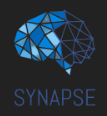

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding. Enough chitchat, lets get to work :P

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [20]:
!pip install shap -q  #Will be used later on

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [23]:
df_crab = pd.read_csv('/content/drive/MyDrive/Copy of train.csv')

In [24]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [25]:
# Your code starts here
def crab_processing(df):
  lw=[]
  df.drop('id',axis=1,inplace=True)
  df=df[df['Height']>0]
  for index,row in df.iterrows():
    if((row['Weight']-(row['Shucked Weight']+row['Viscera Weight']+row['Shell Weight']))>0):
      lw.append(1)
    else:
      lw.append(0)
  df.insert(8,'Lost Weight',lw)
  df=pd.get_dummies(df,columns=['Sex'])
  return df

df_crab = crab_processing(df_crab)
df_crab.head()
# Your code ends here

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8,0,1,0


If all is correct, this should be the shape of your df now.

In [26]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

<Axes: xlabel='Age', ylabel='Count'>

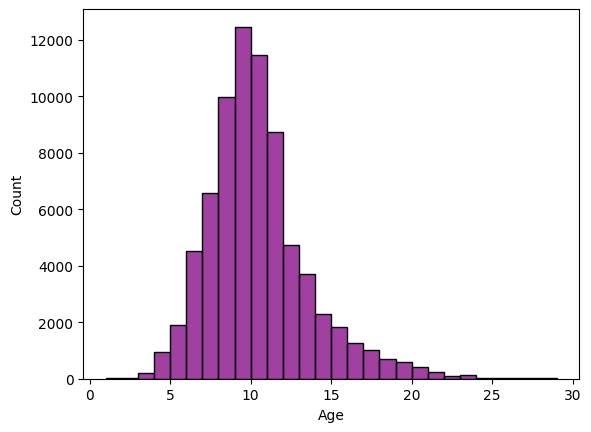

In [27]:
# Your code starts here
sns.histplot(x='Age',data=df_crab,binwidth=1,bins=40,color='purple')
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [28]:
# Your code starts here
X=df_crab.drop('Age',axis=1)
y=df_crab[['Age']]
# Your code ends here

In [29]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
print(X.shape,y.shape)

(74027, 11) (74027, 1)


In [30]:
#Print a few records of X
X.head(10)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,0,1,0
5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,1,0,0,1
6,1.5750,1.1375,0.3500,30.022120,11.935140,7.342521,8.646598,1,0,0,1
7,1.3125,1.0250,0.3500,18.299602,8.249704,3.898056,5.669900,1,0,1,0
8,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,1,1,0,0
9,1.0250,0.7625,0.2625,10.305043,4.493396,2.126212,2.976698,1,0,0,1


In [31]:
#Print a few records of y
y.head(10)

,Age
0,9
1,8
2,9
3,11
4,8
5,10
6,11
7,11
8,12
9,11


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [32]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [33]:
# Your code starts here
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=45)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [34]:
# Your code starts here
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)
print(X_train.size , y_train.size , X_test.size , y_test.size)
test_ratio_X=(X_test.size/X.size)*100
test_ratio_y=(y_test.size/y.size)*100
print(test_ratio_X,"%" ,test_ratio_y,"%")
# Your code ends here

(51818, 11) (51818, 1) (22209, 11) (22209, 1)
569998 51818 244299 22209
30.001215772623503 % 30.001215772623503 %


Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)

###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [35]:
# Add your import statement here
from sklearn.svm import SVR
from sklearn.metrics import  r2_score
# Create an SVR object 'svr' by calling SVR()
svr=SVR()

Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [36]:
# Your code starts here
svr.fit(X_train, y_train)
# Your code ends here

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [37]:
# Your code starts here
predictions = svr.predict(X_test)
print(type(predictions))
print(predictions.shape)
# Your code ends here

<class 'numpy.ndarray'>
(22209,)


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

<Axes: ylabel='Age'>

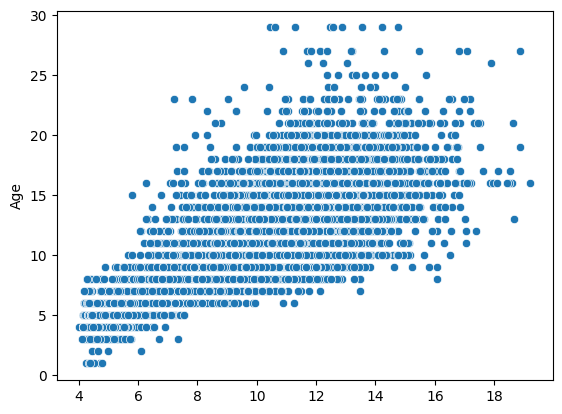

In [38]:
# Your code starts here
sns.scatterplot(x=predictions, y=y_test['Age'])
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [39]:
# Your code starts here
score=r2_score(y_test,predictions)
score=round(score,3)
score
# Your code ends here

0.551

In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

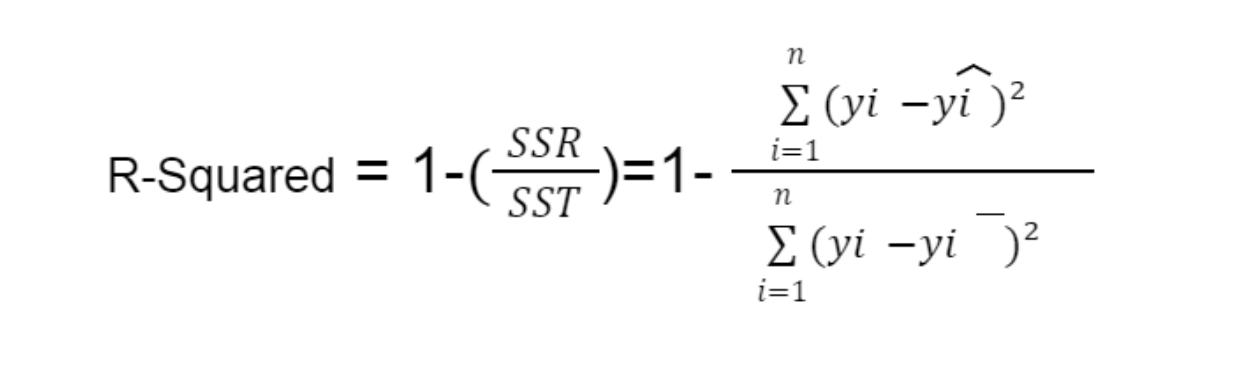
R2=1-(SSR/SST)
This is basicaly how R2 is calculated.

SSR(Sum of Squared Residulas):SSR measures how much the predicted values differ from the actual values, squared, and summed up.It represents the sum of the squared differences between actual value(y) and predicted alue(y^)

SST(Total sum of squares): It represents the sum of the squared deviations of each actual value (y) from the mean value (y).To put it in simple statistical terms of first year , it is the square of mean deviation of actual values of y.

An Ideal R square score would be of 1  as it indicates a perfect fit , i.e. there is no variation between actual and predicted data , i.e. SSR=0

Our model is not that great as its r2 score is 0.542 only and there are models which can give us much greater score.Although lower R2 scores are acceptable in many conditions depending on the context and data since we can still get valuable insigts from the data , for example when I searched the use case of r2 score in human pyscological analysis models , it was somewhere around 50 percent in good models but still the predicted data had valuable information . But in our context it does not apply.



In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
mse=round(mse,3)
print(mse)
"""mse is the mean squared error , it gives the mean squared error between original and the predicted values and the best possible value
is obviously 0 which indicates the perfect fit , it has no range of best values it depends on the data provided too but
the lower the better is the general practice"""
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
variance= y_test.var()
normalized_mse = mse / variance
"""we basically normalize the mse calculated with the variance of the original dataset
which gives us a score between 1 and 0 where 1 is the best case"""
normalized_mse=round(normalized_mse,3)
print(float(normalized_mse))

4.495
0.449


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

Random Forest : Random forest uses multiple decesion trees and then aggregates their value using the various aggregators out of which most commonly used are :Mean , weighted mean , median or you can use any other measure of central tendency as u like.Each branch gives a value , using that the value of the tree is decided the decesion process is made through the aggregator , and then the final value is decided again using choosed aggregator on all of the trees created.

Random forest would work best when the data would be complex/non linear or even in case of multidimensional

Linear Regression:It tries to create one straight line through the data using the least squares method , and expects that the mean squared error for all the data points from this line will be minimum for the same value of the independent variable selected. In this y = mx + c is used and the parameters are calculated using the data given , first the slope is calculated using the data of each point and the mean then using that c is calculated as we put m in y=mx+c and take the values of y and x as their means and slope we calculated earlier.We here try to minimise the sum of squared residuals , i.e. the variance of the actual data wrt the predicted one.

Linear Regression works best when the relationship between independent variables and the target variable is linear and not very complicated , alongside it being low demensional as it is a very baseline model.

Ridge Regression : Ridge regression , like linear regression , creates a line and hopes to give highest accuracy . But here it introduces a bias while creating the line , which helps in reducing the variance .It is very helpful in cases of less training data. In simple words  by starting with a slightly worse fit (due to maybe a not good fit on the smaller training data due to the bias) we get way better long term predictions (due to a greater drop in variance on the testing data which will be relatively bigger than training data which we got).
While linear regression minimizes sum of squared residuals ,the ridge regression minimizes[ SSR + lambda * (the sum of the slopes squared) ].
The sum of slopes part introduces a penalty into the line and whatever lambda we put decides how severe the penalty will be.The ridge regression penalty reduces the dependence of the line on the independent variable.The ridge regression  line has a smaller slope than the least squares line , as lambda increases , the slope decreases , tending to 0 , which indicates no dependence on the independent variable. So to find optimum value of lambda we use cross validation on a bunch of different values of lambda and then use the ones with the lowest variance. With the use of ridge regression we can also efficiently tackle multicollinearity.
It is best used in case of sample sizes being small or training set being small , as the bias created helps to prvide a better solution for the larger test data even from the small obtained train data.So using this property it helps in case of overfitting too.

Ridge regression is best  used when there is multicollinearity or overfitting .

###OPTIONAL: Explainability

So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [41]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


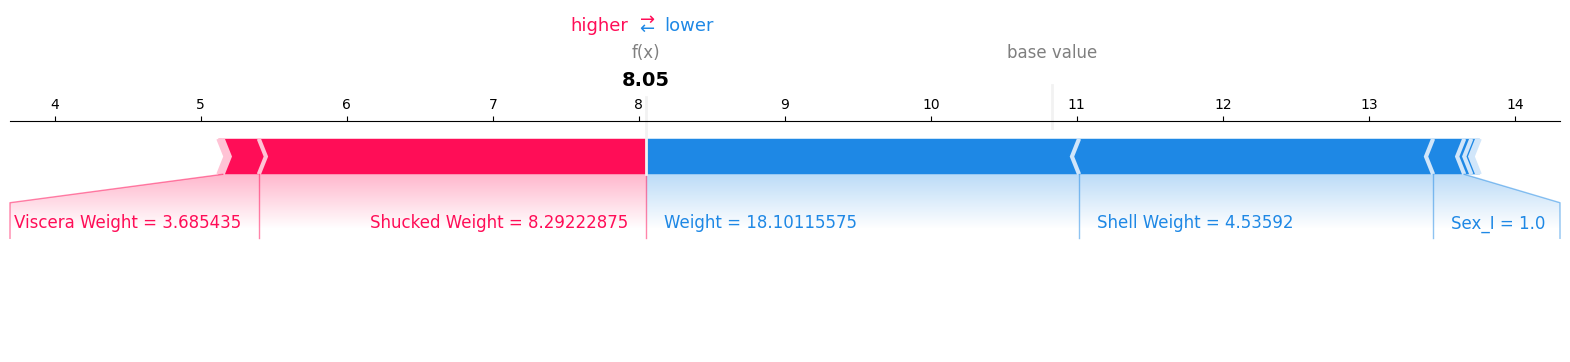

In [42]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Coding resources/classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [73]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [74]:
#describe()
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

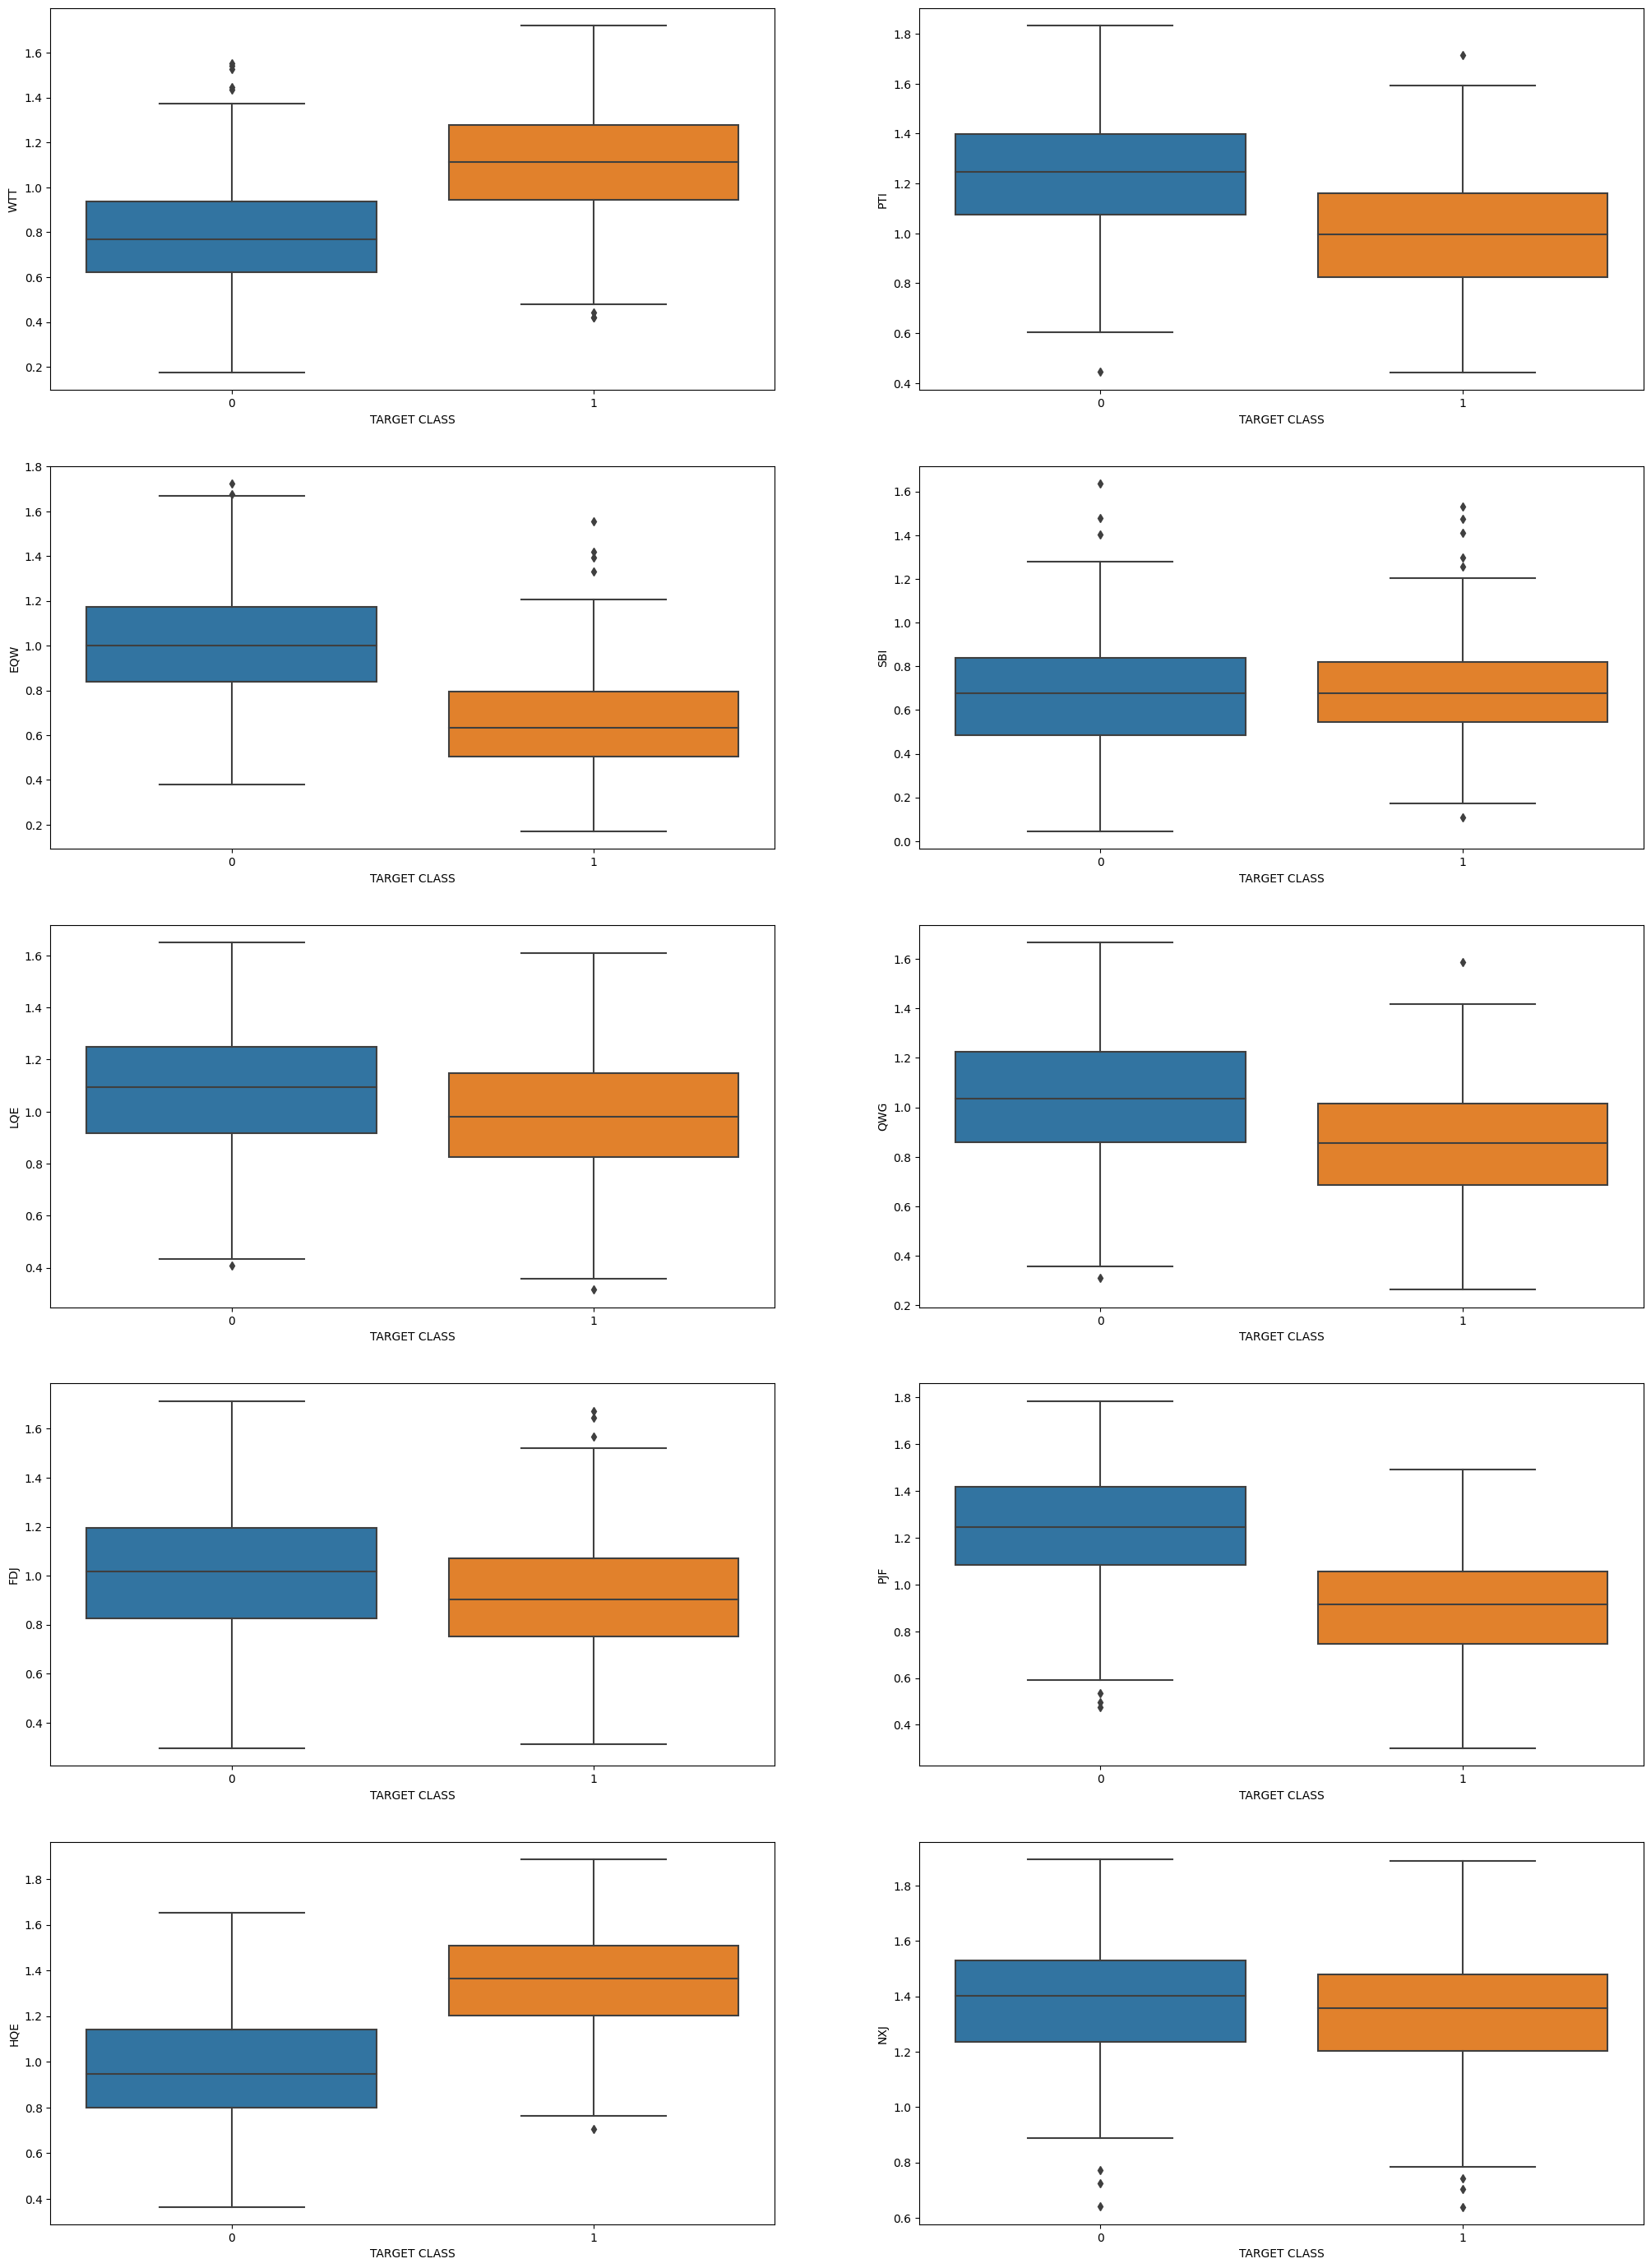

In [75]:
#your code starts here
plt.figure(figsize=(25, 35))

for i , column in enumerate(df.columns[:-1],1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x='TARGET CLASS', y=column)

plt.show()

# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

For WTT and HQE the targets 1  more when values are higher
For PTI , EQW te targets are 0 when values are higher

these are the noticable differences rest have roughly the same probability of being 0 or 1 when in their value range

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [76]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [77]:
# your code starts here
a= df.drop(columns=["TARGET CLASS"])
scaler.fit(a)
a_new= scaler.transform(a)

# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [78]:
# your code starts here
df_feat = pd.DataFrame(a_new, columns=a.columns)
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [79]:
# Your code starts here.
y = df[["TARGET CLASS"]]
X=df_feat
# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [80]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [81]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Your code ends here

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [82]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [83]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [84]:
# Your code starts here.
from sklearn.metrics import accuracy_score
a_s=round(accuracy_score(y_test, pred),3)
print(a_s)
# Your code ends here

0.897


Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [85]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
# Your code starts here.
accuracy_list = []
for i in range(1,61):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))
print(accuracy_list)
print(accuracy_list.index(max(accuracy_list))+1)
# Your code ends here

[0.8966666666666666, 0.88, 0.9133333333333333, 0.9166666666666666, 0.93, 0.9366666666666666, 0.9366666666666666, 0.93, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.93, 0.93, 0.9333333333333333, 0.93, 0.93, 0.93, 0.93, 0.9266666666666666, 0.93, 0.93, 0.93, 0.93, 0.93, 0.9266666666666666, 0.93, 0.9266666666666666, 0.9266666666666666, 0.9233333333333333, 0.9266666666666666, 0.9333333333333333, 0.93, 0.93, 0.93, 0.9333333333333333, 0.9266666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.93, 0.9333333333333333, 0.93, 0.9333333333333333, 0.94, 0.9333333333333333, 0.9333333333333333, 0.9366666666666666, 0.9366666666666666, 0.9333333333333333]
55


**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy')

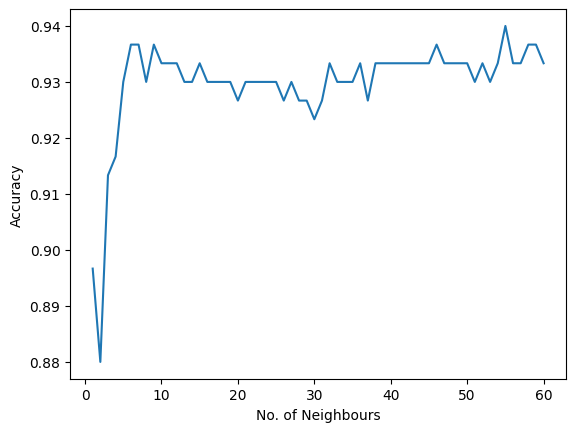

In [86]:
# Your code starts here.
no_of_nbrs = [no for no in range(1,61)]
plt.plot(no_of_nbrs, accuracy_list, label = 'K value vs Accuracy')
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy')
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [87]:
# Your code starts here.
n_acc_best = accuracy_list[54]
n_neigh_best = 55
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 55
Corresponding highest accuracy: 0.94


In [88]:
# Reasons:
""" Low values of neighbours are used like 1 or 2 can be noisy and can be heavily affected by outliers too ,
very high values of neighbours will be a problem when some of the categories have less samples as high number of neighbours can
totally ignore that category after a certain number of neighbours ,
so we have to find out an optimum number which is neither large nor small
In our case when finding out between 1 to 60 neighbours we got the best accuracy in 55 neighbours
so we chose to put 55 neighbours for the highest accuracy
  """

' Low values of neighbours are used like 1 or 2 can be noisy and can be heavily affected by outliers too ,\nvery high values of neighbours will be a problem when some of the categories have less samples as high number of neighbours can\ntotally ignore that category after a certain number of neighbours ,\nso we have to find out an optimum number which is neither large nor small\nIn our case when finding out between 1 to 60 neighbours we got the best accuracy in 55 neighbours\nso we chose to put 55 neighbours for the highest accuracy\n  '

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Reinforcement Learning**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024

